In [0]:
from sklearn.datasets import load_iris

iris = load_iris()

In [0]:
import pandas as pd

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd.head()

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(iris.target_names)

iris_pd['species'] = le.inverse_transform(iris.target)
iris_pd.head()

In [0]:
import seaborn as sns

sns.pairplot(iris_pd, hue='species', height=2)

In [0]:
from sklearn.model_selection import train_test_split

feature_data = iris.data[:, 2:]


In [0]:
X_train, X_test, y_train, y_test = \
                    train_test_split(feature_data, iris.target,
                                         test_size=0.2,
                                         random_state=13)

In [8]:
import numpy as np

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([ 9,  8, 13]))

In [9]:
X_train, X_test, y_train, y_test = \
                        train_test_split(feature_data, iris.target,
                                         test_size=0.2,
                                         random_state=13,
                                         stratify = iris.target)

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

In [21]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=13, splitter='best')

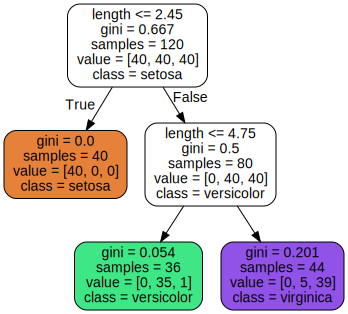

In [22]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(iris_tree, feature_names=['length', 'width'],
                       class_names=iris.target_names,
                       rounded=True, filled=True))

In [18]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.95

In [23]:
y_pred_tr

array([1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1,
       2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 2, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0,
       1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2,
       0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0,
       0, 0, 1, 2, 1, 2, 2, 2, 1, 2])

In [24]:
y_train

array([2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1,
       2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1,
       0, 2, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0,
       1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 1, 2,
       0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0,
       0, 0, 1, 2, 1, 2, 2, 2, 1, 2])

In [30]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9666666666666667

In [29]:
y_test

array([2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 0,
       2, 1, 2, 0, 2, 0, 2, 1])

In [28]:
y_pred_test

array([2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 0,
       2, 1, 2, 0, 2, 0, 2, 1])

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

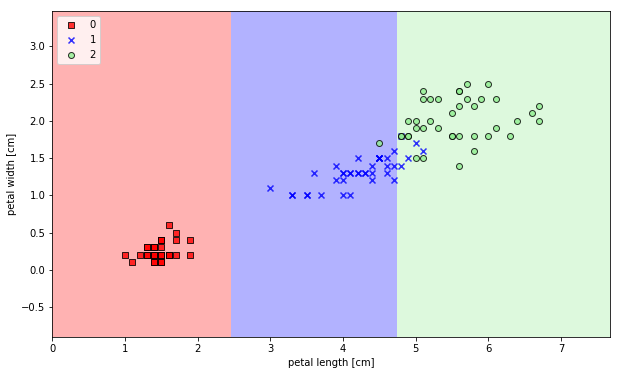

In [33]:
plt.figure(figsize=(10,6))
plot_decision_regions(X=X_train, y=y_train,
                      classifier=iris_tree)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

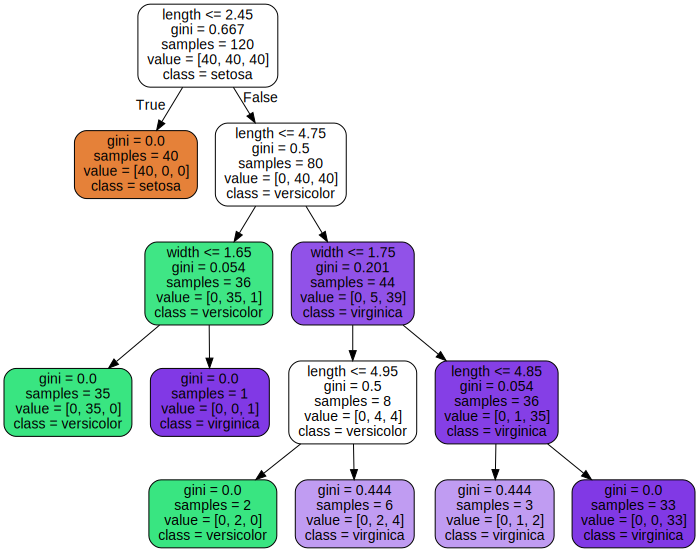

In [34]:
iris_tree = DecisionTreeClassifier(max_depth=4, random_state=13)
iris_tree.fit(X_train, y_train)

Source(export_graphviz(iris_tree, feature_names=['length', 'width'],
                       class_names=iris.target_names,
                       rounded=True, filled=True))

In [36]:
y_pred_tr = iris_tree.predict(X_train)
y_pred_test = iris_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.975
1.0


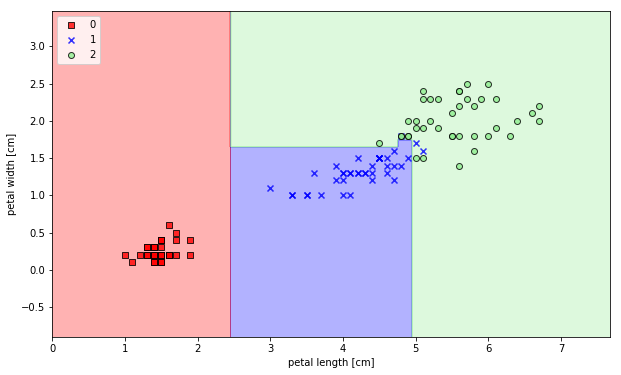

In [35]:
plt.figure(figsize=(10,6))
plot_decision_regions(X=X_train, y=y_train,
                      classifier=iris_tree)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

In [37]:
iris.data.shape

(150, 4)

In [38]:
X_train, X_test, y_train, y_test = \
                        train_test_split(iris.data, iris.target,
                                         test_size=0.2,
                                         random_state=13,
                                         stratify = iris.target)
                        
iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=13, splitter='best')

In [39]:
y_pred_tr = iris_tree.predict(X_train)
y_pred_test = iris_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.95
0.9666666666666667


In [40]:
iris_tree.predict([[5, 3.5, 1.45, 0.25]])

array([0])

In [41]:
iris_tree.predict_proba([[5, 3.5, 1.45, 0.25]])

array([[1., 0., 0.]])

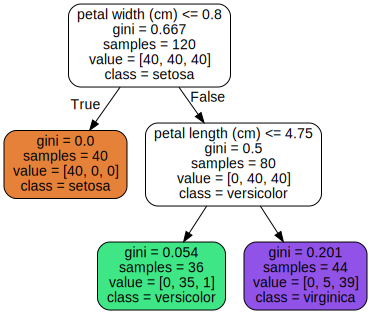

In [42]:
Source(export_graphviz(iris_tree, feature_names=iris.feature_names,
                       class_names=iris.target_names,
                       rounded=True, filled=True))

In [43]:
iris_tree.feature_importances_

array([0.        , 0.        , 0.42189781, 0.57810219])

In [44]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']